In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv", parse_dates = ["Datetime"])
test_data = pd.read_csv("test.csv", parse_dates = ["Datetime"])
samplesubmission = pd.read_csv("SampleSubmission.csv")
train_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [3]:
test_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [4]:
samplesubmission.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


In [5]:
print("train_data shape: " + str(train_data.shape))
print("test_data shape: " + str(test_data.shape))
print("samplesubmission shape: " + str(samplesubmission.shape))

train_data shape: (297177, 7)
test_data shape: (127361, 6)
samplesubmission shape: (127361, 2)


In [6]:
train_data.describe(include = "all")

C:\Users\ROBERT~1\AppData\Local\Temp/ipykernel_14600/2742851199.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_data.describe(include = "all")


,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-10-15 16:00:31,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-21 07:34:57,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.751195,38.183018,23.316554,78.653623,0.371072
std,NaN,NaN,28.526182,28.647761,3.836971,14.772725,0.483092
min,NaN,NaN,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,NaN,NaN,22.430000,19.520000,20.400000,68.000000,0.000000


In [7]:
train_data.isnull().sum().any(), test_data.isnull().sum().any()

(True, True)

In [8]:
train_data.fillna(0)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
...,...,...,...,...,...,...,...
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1
297174,ID_0OAQMV7USTI4,2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,96.45,114.67,20.6,93.0,0


In [9]:
train_data.duplicated().any(), test_data.duplicated().any()

(False, False)

In [10]:
train_data['Datetime_day'] = train_data.Datetime.dt.day
train_data['Datetime_month'] = train_data.Datetime.dt.month
train_data['Datetime_year'] = train_data.Datetime.dt.year
train_data['Datetime_hour'] = train_data.Datetime.dt.hour
train_data[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,3,11,2021,4
1,2021-11-08 18:43:23,8,11,2021,18
2,2021-11-07 09:50:33,7,11,2021,9
3,2022-01-01 18:55:15,1,1,2022,18
4,2021-11-05 22:23:48,5,11,2021,22


In [11]:
test_data['Datetime_day'] = test_data.Datetime.dt.day
test_data['Datetime_month'] = test_data.Datetime.dt.month
test_data['Datetime_year'] = test_data.Datetime.dt.year
test_data['Datetime_hour'] = test_data.Datetime.dt.hour
test_data[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2022-01-28 08:49:41,28,1,2022,8
1,2022-02-16 21:30:17,16,2,2022,21
2,2022-01-24 17:57:18,24,1,2022,17
3,2022-01-31 07:07:09,31,1,2022,7
4,2022-01-31 00:37:05,31,1,2022,0


In [12]:
train_feats = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity", "Datetime_day", "Datetime_month", "Datetime_year", "Datetime_hour"]
X = train_data[train_feats].fillna(0)
y = train_data["Offset_fault"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
print(X_train.shape)
print(y_train.shape)

(208023, 8)
(208023,)


In [15]:
p_pred = knn.predict_proba(X_train)
y_pred = knn.predict(X_test)

<AxesSubplot:xlabel='Sensor1_PM2.5', ylabel='Offset_fault'>

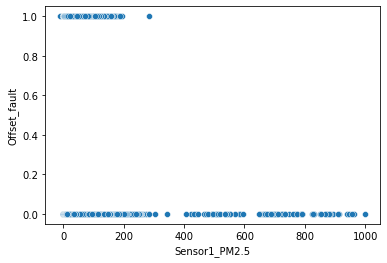

In [16]:
sns.scatterplot(x = train_data["Sensor1_PM2.5"], y = train_data["Offset_fault"])

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Actual label')

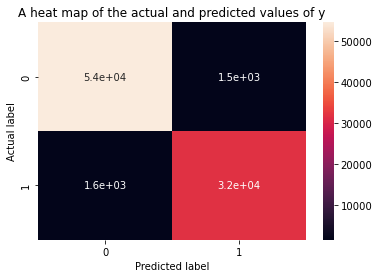

In [18]:
sns.heatmap(pd.DataFrame(conf_matrix), annot = True)
plt.title("A heat map of the actual and predicted values of y")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Report" + str(report))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))

Report              precision    recall  f1-score   support

           0       0.97      0.97      0.97     55966
           1       0.96      0.95      0.95     33188

    accuracy                           0.97     89154
   macro avg       0.96      0.96      0.96     89154
weighted avg       0.97      0.97      0.97     89154

Accuracy: 0.9654754694124773
Precision: 0.955411700647347
